In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import warnings
warnings.filterwarnings("ignore")

## Step One
---

#### Read in your data

In [2]:
### start code
df = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
df = df.iloc[:,1:]
df.head()
### end code

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Step Two - Exploratory Data Analysis
---
#### Check number of rows and columns

In [3]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 18249
Columns: 13


## Step Three
---

In [4]:
#print unique values for type column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
#print unique values for region column
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
df.region.describe()

count      18249
unique        54
top       Denver
freq         338
Name: region, dtype: object

In [7]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

## Step Four
---
#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so you will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.



In [8]:
df1 = df[df.region.isin(['BuffaloRochester', 'SanDiego', 'DallasFtWorth'])]
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
260,12/27/2015,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.0,0.0,conventional,2015,BuffaloRochester
261,12/20/2015,1.37,90867.51,1164.92,38430.71,106.67,51165.21,51165.21,0.0,0.0,conventional,2015,BuffaloRochester
262,12/13/2015,1.35,98473.23,1421.12,40783.22,66.45,56202.44,56202.44,0.0,0.0,conventional,2015,BuffaloRochester
263,12/6/2015,1.23,108457.82,1737.71,58197.34,167.12,48355.65,48355.65,0.0,0.0,conventional,2015,BuffaloRochester
264,11/29/2015,1.39,79973.14,1514.69,35682.71,113.49,42662.25,42662.25,0.0,0.0,conventional,2015,BuffaloRochester


In [9]:
df1.region.describe()

count                 1014
unique                   3
top       BuffaloRochester
freq                   338
Name: region, dtype: object

## Step Five
---
#### recode 'type' and 'region' columns

In [10]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
df1['typeR'] = df1['type'].apply(recode)

In [11]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR
260,12/27/2015,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.0,0.0,conventional,2015,BuffaloRochester,0
261,12/20/2015,1.37,90867.51,1164.92,38430.71,106.67,51165.21,51165.21,0.0,0.0,conventional,2015,BuffaloRochester,0
262,12/13/2015,1.35,98473.23,1421.12,40783.22,66.45,56202.44,56202.44,0.0,0.0,conventional,2015,BuffaloRochester,0
263,12/6/2015,1.23,108457.82,1737.71,58197.34,167.12,48355.65,48355.65,0.0,0.0,conventional,2015,BuffaloRochester,0
264,11/29/2015,1.39,79973.14,1514.69,35682.71,113.49,42662.25,42662.25,0.0,0.0,conventional,2015,BuffaloRochester,0


In [12]:
def recode(series):
    if series == 'BuffaloRochester':
        return 0
    if series == 'SanDiego':
        return 1
    if series == 'DallasFtWorth':
        return 2
    
df1['regionR'] = df1['region'].apply(recode)

In [13]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,regionR
260,12/27/2015,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.0,0.0,conventional,2015,BuffaloRochester,0,0
261,12/20/2015,1.37,90867.51,1164.92,38430.71,106.67,51165.21,51165.21,0.0,0.0,conventional,2015,BuffaloRochester,0,0
262,12/13/2015,1.35,98473.23,1421.12,40783.22,66.45,56202.44,56202.44,0.0,0.0,conventional,2015,BuffaloRochester,0,0
263,12/6/2015,1.23,108457.82,1737.71,58197.34,167.12,48355.65,48355.65,0.0,0.0,conventional,2015,BuffaloRochester,0,0
264,11/29/2015,1.39,79973.14,1514.69,35682.71,113.49,42662.25,42662.25,0.0,0.0,conventional,2015,BuffaloRochester,0,0


In [14]:
df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,typeR,regionR
18100,2/4/2018,1.81,17454.74,1158.41,7388.27,0.0,8908.06,8908.06,0.0,0.0,organic,2018,SanDiego,1,1
18101,1/28/2018,1.91,17579.47,1145.64,8284.41,0.0,8149.42,8149.42,0.0,0.0,organic,2018,SanDiego,1,1
18102,1/21/2018,1.95,18676.37,1088.49,9282.37,0.0,8305.51,8305.51,0.0,0.0,organic,2018,SanDiego,1,1
18103,1/14/2018,1.81,21770.02,3285.98,14338.52,0.0,4145.52,4145.52,0.0,0.0,organic,2018,SanDiego,1,1
18104,1/7/2018,2.06,16746.82,5150.82,9366.31,0.0,2229.69,2229.69,0.0,0.0,organic,2018,SanDiego,1,1


## Step Six
---
#### Test for assumptions

- Normality
- Homogeneity of Variance

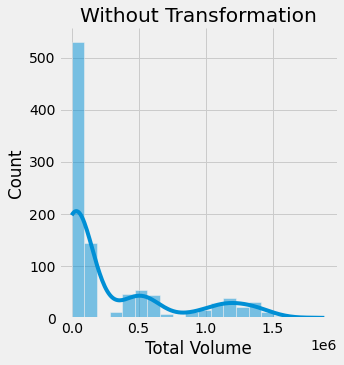

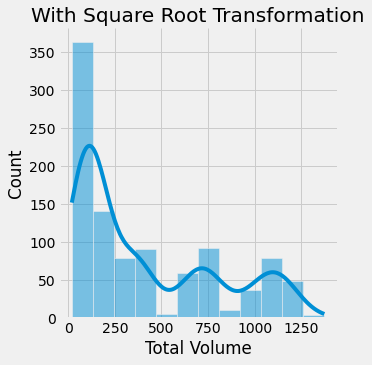

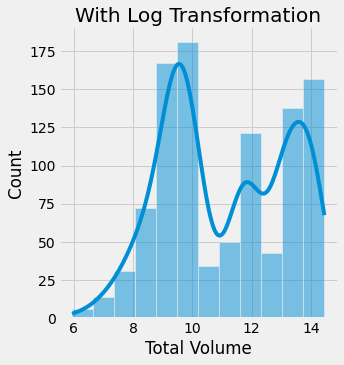

In [15]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(df1['Total Volume'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(df1['Total Volume']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(df1['Total Volume']), kde = True).set(title='With Log Transformation')

In [16]:
#perform log transformation
df1['Total Volume_log'] = np.log(df1['Total Volume'])

In [17]:
bartlett(df1["Total Volume_log"], df1["regionR"])

BartlettResult(statistic=772.6939773219534, pvalue=4.666709606924662e-170)

In [18]:
#explain your results



In [19]:
f_oneway(
    df["Total Volume"][df["region"]=='city 1'],
    df["Total Volume"][df["region"]=='city 2'],
    df["Total Volume"][df["region"]=='city 3']
)

F_onewayResult(statistic=nan, pvalue=nan)

In [20]:
#explain your results



In [21]:
postHocResults = MultiComparison(df1["Total Volume_log"], df1["region"]).tukeyhsd()
print(postHocResults)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2    meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------
BuffaloRochester DallasFtWorth   1.8815 0.001  1.5352  2.2277   True
BuffaloRochester      SanDiego   1.2851 0.001  0.9388  1.6313   True
   DallasFtWorth      SanDiego  -0.5964 0.001 -0.9426 -0.2502   True
--------------------------------------------------------------------


In [22]:
#explain your results



## Step Seven
---

In [23]:
df2 = df1[['region', 'Total Volume']]

df2.groupby('region').mean()

,Total Volume
region,
BuffaloRochester,67936.302959
DallasFtWorth,616625.108136
SanDiego,265656.567130


In [ ]:
#explain your results

